# Titanic Survival Prediction
The sinking of the Titanic is one of the most infamous shipwrecks in history. <br>
On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" RMS Titanic sank after colliding with an icebers. Due to lack of lifeboats onboard, 1502 people lost their lives out of 2224 people (including crew). <br>
While there was some element of luck involved in suriving, it seems some group of people were more likely to survive than others. 
The dataset consists of details of 1309 passengers on board (891 in training set and 418 in test set). <br>
The dataset can be found [**here**](https://www.kaggle.com/c/titanic/data).

## Table of Contents
1. [Importing modules and the dataset](#1)
2. [Data cleaning / Prepping](#2)
3. [Some Exploratory Data Analysis](#3)
4. [Feature Engineering](#4)
5. [Model training](#5)
6. [Conclusion](#6)

<div id='1'></div>

<br>

### **1. Importing modules and the dataset**

In [1]:
# Set up
import numpy as np
import pandas as pd
import re

# Visualizations
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# ML
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

target = train.Survived

display(train.head())
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<div id='2'></div>

<br>

### **2. Data Cleaning / Prepping**

In [4]:
print('Train columns with null values:')
print(train.isnull().sum())

print('\nTest columns with null values:')
print(test.isnull().sum())

Train columns with null values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test columns with null values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# Taking care of missing data in Training set
train['Age'].fillna(train['Age'].median(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
train['Fare'].fillna(train['Fare'].median(), inplace = True)
train['Cabin'].fillna('U', inplace = True)

In [6]:
test['Age'].fillna(test['Age'].median(), inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)
test['Cabin'].fillna('U', inplace = True)

In [7]:
print('Train columns with null values:')
print(train.isnull().sum())

print('\nTest columns with null values:')
print(test.isnull().sum())

Train columns with null values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Test columns with null values:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<div id='3'></div>

<br>

### **3. Some Exploratory Data Analysis**

#### a) Univariate Analysis

In [8]:
print(f'Unique Values in Pclass :{train.Pclass.unique()}')
print(f'Unique Values in SibSp :{train.SibSp.unique()}')
print(f'Unique Values in Embarked :{train.Embarked.unique()}')

Unique Values in Pclass :[3 1 2]
Unique Values in SibSp :[1 0 3 4 2 5 8]
Unique Values in Embarked :['S' 'C' 'Q']


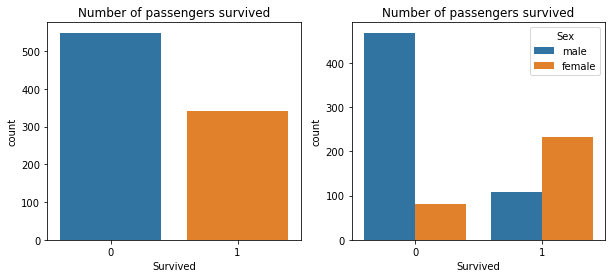

In [9]:
# Analyzing the target feature 
plt.figure(figsize = (10, 4))

plt.subplot(121)
sns.countplot(x = train['Survived'])
plt.title('Number of passengers survived')

plt.subplot(122)
sns.countplot(x = 'Survived', hue = 'Sex', data = train)
plt.title('Number of passengers survived')

plt.show()

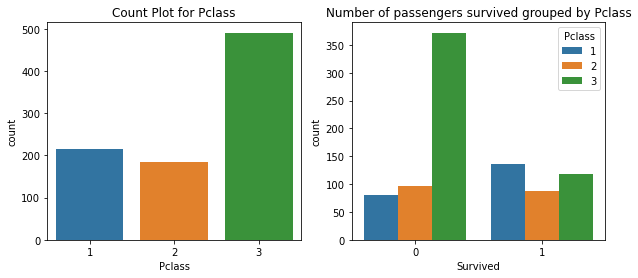

In [10]:
# Analyzing the Pclass
plt.figure(figsize = (10, 4))

plt.subplot(121)
sns.countplot(x = train['Pclass'])
plt.title('Count Plot for Pclass')

plt.subplot(122)
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)
plt.title('Number of passengers survived grouped by Pclass')

plt.show()

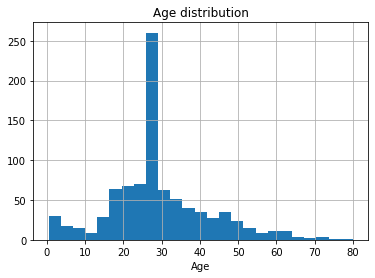

In [11]:
# Age Columns
train['Age'].hist(bins = 25)
plt.xlabel('Age')
plt.title('Age distribution')
plt.show()

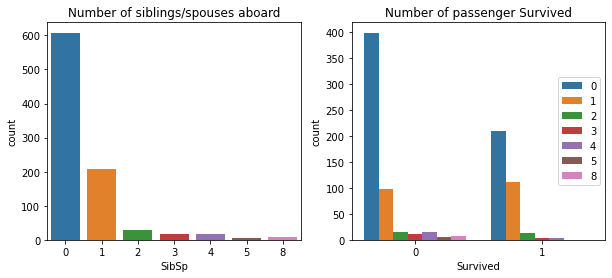

In [12]:
# Analyzing siblings / spouses onboard
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.countplot(x = train['SibSp'])
plt.title('Number of siblings/spouses aboard')

plt.subplot(122)
sns.countplot(x='Survived', hue='SibSp', data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived')

plt.show()

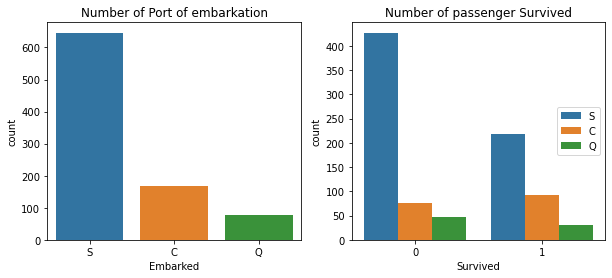

In [13]:
# Analyzing Embarktion port
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.countplot(x = train['Embarked'])
plt.title('Number of Port of embarkation')

plt.subplot(122)
sns.countplot(x='Survived', hue='Embarked', data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived')

plt.show()

<br>

#### b) Bivariate Analysis

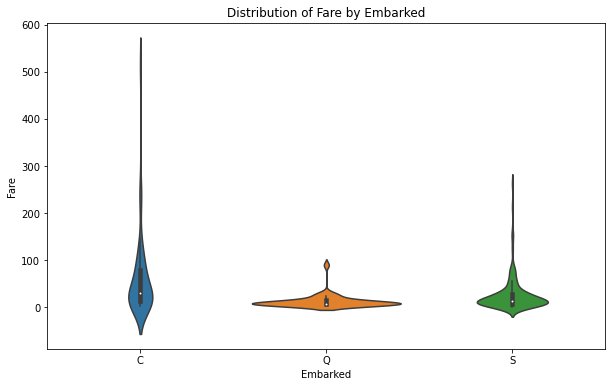

In [14]:
# Fare vs Embarked 
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Embarked', y = 'Fare', data = train, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.show()

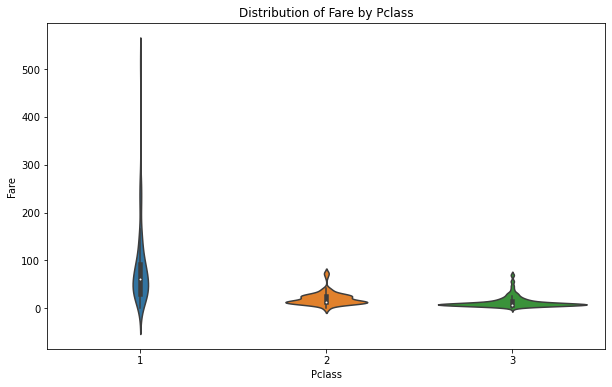

In [15]:
# Fare vs Pclass
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Pclass', y = 'Fare', data = train)
plt.title('Distribution of Fare by Pclass')
plt.show()

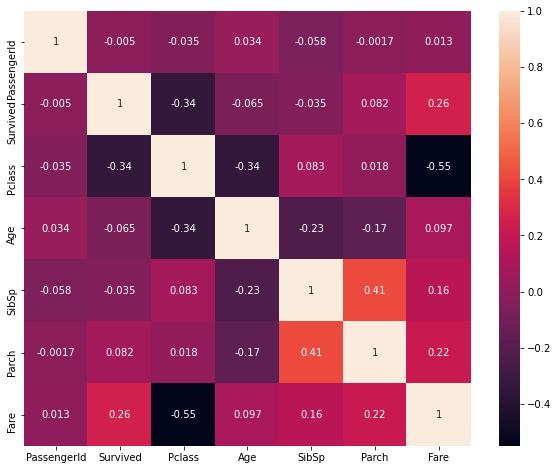

In [16]:
# Correlation Heatmap 
plt.figure(figsize = (10, 8))
sns.heatmap(train.corr(), annot = True)
plt.show()

<div id='4'></div>

<br>

### **4. Feature Engineering**

<br> 
Fixing Sex column with integers as it is a categorical value

In [17]:
train['Sex'].replace({'male': 0, 'female': 1}, inplace = True)
test['Sex'].replace({'male': 0, 'female': 1}, inplace = True)

<br>
Taking care of the Embarked as it is a categorical value, we will encode it using OneHotEncoder.

In [18]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

<br> 
Taking care of the Cabin List

In [21]:
#Taking care of the Cabin List 
train.Cabin.tolist()[0: 15]

['U',
 'C85',
 'U',
 'C123',
 'U',
 'U',
 'E46',
 'U',
 'U',
 'U',
 'G6',
 'C103',
 'U',
 'U',
 'U']

In [22]:
# Taking only the alphabets using regex
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [23]:
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [24]:
cabin_category = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'T' : 8, 'U' : 9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

<br>

#### Now comes an important part, 

to fix the names i.e. to extract the titles, as the titles contribute in deciding survivability.

In [25]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [27]:
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

<br> 
Too many titles, we have to bundle them.

In [28]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [29]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

<br>

Now we need to encode these titles, using OneHotEncoder

In [30]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

# The columns 0, 1, 2, 3, 4 are OneHotEncoded acc. to titles

Well, this was very hard. <br>
I referred 2 notebooks on this dataset to reach till here. Phew.

<br>

Making a new column "familySize"

In [31]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


<br>
Finally dropping the SibSp, Parch, Ticket columns

In [33]:
train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1, inplace = True)
test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1, inplace = True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [35]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,892,3,0,34.5,7.8292,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,893,3,1,47.0,7.0000,9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,894,2,0,62.0,9.6875,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,895,3,0,27.0,8.6625,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,896,3,1,22.0,12.2875,9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3


<br>

#### Principal Component Analysis (PCA)
Performing PCA to visualize our final dataset

In [36]:
columns = train.columns[2: ]

X_train = StandardScaler().fit_transform(train.drop(columns = ['PassengerId', 'Survived']))
pca_df = pd.DataFrame(X_train, columns = columns)

In [37]:
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(pca_df)

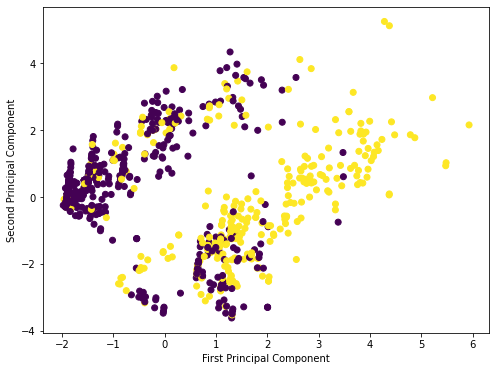

In [38]:
plt.figure(figsize = (8, 6))

plt.scatter(pca_df[:, 0], pca_df[:, 1], c = target)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

Dataset is hot and ready to be served to some Machine Learning models.

<div id='5'></div>

<br>

### **5. Model Training**

In [39]:
X = train.drop(['PassengerId', 'Survived'], axis = 1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (801, 14)
X_test shape: (90, 14)
y_train shape: (801,)
y_test shape: (90,)


<br>

#### a) Logistic Regression
First we will rescale our data, and then apply Logistic Regression

In [40]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_pred, y_test)
print(f'The accuracy of Logistic Regression is: {accuracy_logreg}')

The accuracy of Logistic Regression is: 0.8444444444444444


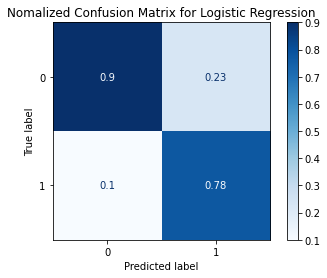

In [42]:
conf_mat_logreg = confusion_matrix(y_pred, y_test)
plot = plot_confusion_matrix(logreg, X_test_scaled, y_test, cmap = plt.cm.Blues, normalize = 'pred')
plot.ax_.set_title("Nomalized Confusion Matrix for Logistic Regression")
plt.show()

<br>

#### b) KNN Classifier

In [43]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_pred, y_test)
print(f'The accuracy of KNN is: {accuracy_knn}')

The accuracy of KNN is: 0.8222222222222222


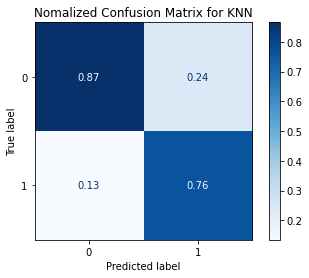

In [44]:
conf_mat_knn = confusion_matrix(y_pred, y_test)
plot = plot_confusion_matrix(knn, X_test_scaled, y_test, cmap = plt.cm.Blues, normalize = 'pred')
plot.ax_.set_title("Nomalized Confusion Matrix for KNN")
plt.show()

<br>

#### c) Support Vector Classifier

In [45]:
svc = SVC(gamma = 0.1)
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_pred, y_test)
print(f'The accuracy of SVC (RBF Kernel) is: {accuracy_svc}')

The accuracy of SVC (RBF Kernel) is: 0.8333333333333334


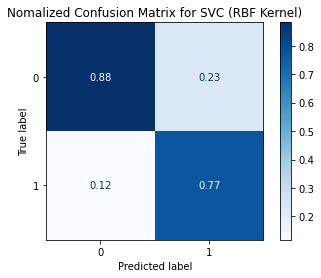

In [46]:
conf_mat_svc = confusion_matrix(y_pred, y_test)
plot = plot_confusion_matrix(svc, X_test_scaled, y_test, cmap = plt.cm.Blues, normalize = 'pred')
plot.ax_.set_title("Nomalized Confusion Matrix for SVC (RBF Kernel)")
plt.show()

<br> 

#### d) Decision Tree

In [47]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_pred, y_test)
print(f'The accuracy of Decision Tree is: {accuracy_dt}')

The accuracy of Decision Tree is: 0.8444444444444444


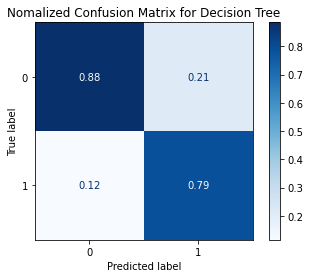

In [48]:
conf_mat_dt = confusion_matrix(y_pred, y_test)
plot = plot_confusion_matrix(dt, X_test_scaled, y_test, cmap = plt.cm.Blues, normalize = 'pred')
plot.ax_.set_title("Nomalized Confusion Matrix for Decision Tree")
plt.show()

<div id = '6'></div>

<br>

#### **6. Conclusion**

In [49]:
model_names = ['Logistic Regression', 'kNN', 'Support Vector Classifier', 'Decision Tree']

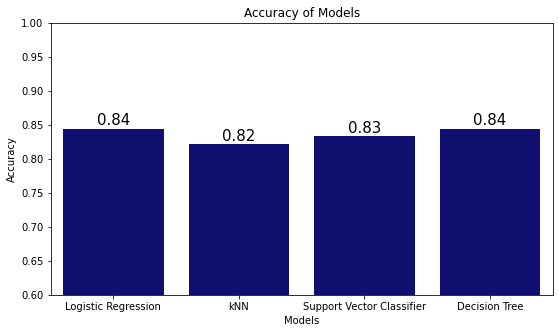

In [50]:
accuracy = [accuracy_logreg, accuracy_knn, accuracy_svc, accuracy_dt]

plt.figure(figsize = (9, 5))
plot = sns.barplot(x = model_names, y = accuracy, color = 'navy')
plt.ylim(0.60, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title('Accuracy of Models')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

Logistic Regression and Decision Tree have accuracy of 0.84, which can be substantially improved by using any other _Hypertuned model._